In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Dog_comment_merge.csv')

In [3]:
df.head()

,Review,Detail,Rating
0,My dogs love it - but currently out of stock,Yes and yes! Both my border collie and Chihuah...,4.7
1,Inconsistent quality,My dog has been eating this dog food for 10 ye...,5.0
2,I've not had problems with this food,I've had no problems with this brand of BB dog...,3.0
3,Fast and convenient,"Order came fast. My pups love this brand, much...",5.0
4,My dog loves it!,My dogs have been eating this a few years now ...,4.0


In [4]:
df.shape

(997, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  997 non-null    object 
 1   Detail  997 non-null    object 
 2   Rating  997 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [10]:
df.Review.head()

0    My dogs love it - but currently out of stock
1                            Inconsistent quality
2            I've not had problems with this food
3                             Fast and convenient
4                                My dog loves it!
Name: Review, dtype: object

# Text Preprocessing

In [11]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Detail'] = df['Detail'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [12]:
df['Detail'] = df['Detail'].str.replace('[^\w\s]', "")
df.Detail.head(5)

0    yes and yes both my border collie and chihuahu...
1    my dog has been eating this dog food for 10 ye...
2    ive had no problems with this brand of bb dog ...
3    order came fast my pups love this brand much b...
4    my dogs have been eating this a few years now ...
Name: Detail, dtype: object

# Removal of Stop Words

In [13]:
stop = stopwords.words('english')
df['Detail'] = df['Detail'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Detail.head()

0    yes yes border collie chihuahua mix love stock...
1    dog eating dog food 10 years noticed order ama...
2    ive problems brand bb dog food started shipmen...
3          order came fast pups love brand much better
4    dogs eating years love one dogs pancreatitis p...
Name: Detail, dtype: object

# Spelling Correction

## Lemmatization

In [22]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [23]:
df['Detail'] = df['Detail'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Detail.head()

0    yes yes border collie chihuahua mix love stock...
1    dog eating dog food 10 year noticed order amaz...
2    ive problem brand bb dog food started shipment...
3           order came fast pup love brand much better
4    dog eating year love one dog pancreatitis pres...
Name: Detail, dtype: object

## Look at the Summary Text using wordcloud

In [24]:
! pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp36-cp36m-win_amd64.whl (161 kB)


In [25]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [26]:
df.columns

Index(['Review', 'Detail', 'Rating'], dtype='object')

In [27]:
df.Rating.value_counts()

5.0    628
4.0    132
3.0    122
4.7     74
1.0     22
2.0     19
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

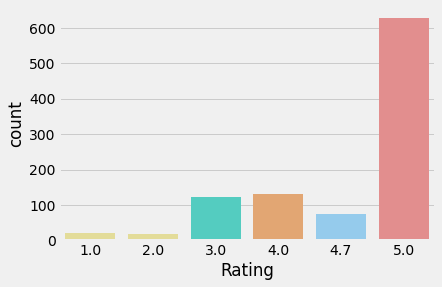

In [104]:
import seaborn as sns
sns.countplot(data = df, x = 'Rating', palette=['khaki','khaki','turquoise','sandybrown','lightskyblue','lightcoral'])

In [50]:
score_1 = df[df['Rating'] == 1]
score_2 = df[df['Rating'] == 2]
score_3 = df[df['Rating'] == 3]
score_4 = df[df['Rating'] == 4]
score_4_7 = df[df['Rating'] == 4.7]
score_5 = df[df['Rating'] == 5]

In [51]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_4_7,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

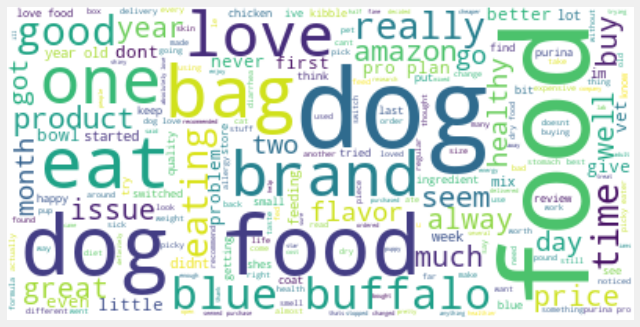

In [106]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Detail.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

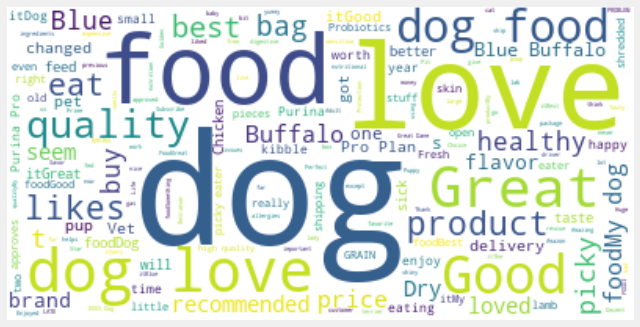

In [53]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([4,4.7,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Detail.str.cat()
positive_reviews_str = positive_reviews.Detail.str.cat()

## Create WordCloud

Text(0.5, 1.0, 'Reviews with Negative Scores')

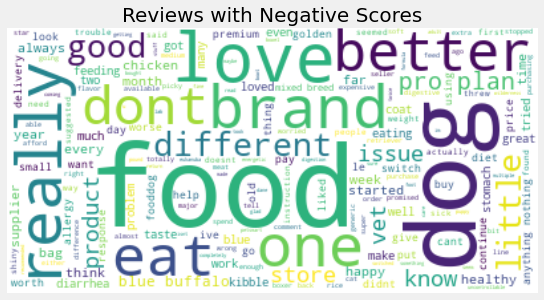

In [55]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

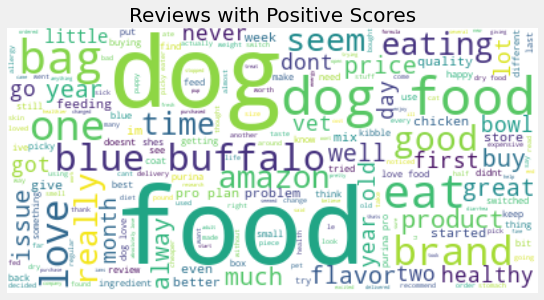

In [56]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()


## Install vaderSentiment

In [43]:
!pip install vaderSentiment

In [58]:
import seaborn as sns
import re
import os
import sys
import ast

PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
BACKCOLOR = '#f6f5f5'

plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.set_palette(PALETTE)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [59]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Detail']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.648,0.352,0.9360
1,0.188,0.694,0.118,-0.5719
2,0.061,0.816,0.124,0.6249
3,0.000,0.458,0.542,0.7964
4,0.000,0.802,0.198,0.6369


In [60]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Review,Detail,Rating,neg,neu,pos,compound
0,My dogs love it - but currently out of stock,yes yes border collie chihuahua mix love stock...,4.7,0.000,0.648,0.352,0.9360
1,Inconsistent quality,dog eating dog food 10 year noticed order amaz...,5.0,0.188,0.694,0.118,-0.5719
2,I've not had problems with this food,ive problem brand bb dog food started shipment...,3.0,0.061,0.816,0.124,0.6249


In [61]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Review,Detail,Rating,neg,neu,pos,compound,Sentiment
0,My dogs love it - but currently out of stock,yes yes border collie chihuahua mix love stock...,4.7,0.000,0.648,0.352,0.9360,Positive
1,Inconsistent quality,dog eating dog food 10 year noticed order amaz...,5.0,0.188,0.694,0.118,-0.5719,Negative
2,I've not had problems with this food,ive problem brand bb dog food started shipment...,3.0,0.061,0.816,0.124,0.6249,Positive
3,Fast and convenient,order came fast pup love brand much better,5.0,0.000,0.458,0.542,0.7964,Positive
4,My dog loves it!,dog eating year love one dog pancreatitis pres...,4.0,0.000,0.802,0.198,0.6369,Positive


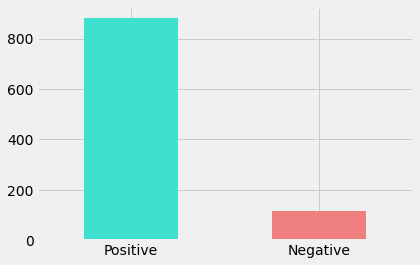

In [101]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['turquoise', 'lightcoral']);